**Recopiez ce notebook et envoyez-moi le lien à la fin de la séance.**

Votre **nom**: NGUYEN


Votre **prénom**: Tai

Votre **nombre etudiant**: 12108339


*Observations/commentaires éventuels de l'étudiant à l'enseignant*:

## Example 1: optimization of linear model by gradient descent in pure Python

This example illustrates the principle of gradient descent. We optimise a linear model (only one parameter w) with quadratic cost.

Pure python, without any framework.

*Emmanuel Viennet, 2019-12-15*, *2022-01-11*.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

# Data: inputs x (scalar real values), target outputs y
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0] # ie for x=1, we want y=2...

Le modèle va calculer la sortie $y$ en fonction de l'entrée $x$. 

Un modèle linéaire (sans biais) va calculer simplement $f(x) = w . x$.

On appelle $w$ le poids (paramètre).

**Question**: Quel est selon vous la meillerue valeur de $w$ (un nombre réel) compte tenu des données (exemple) ci-dessus (x_data, y_data) ?


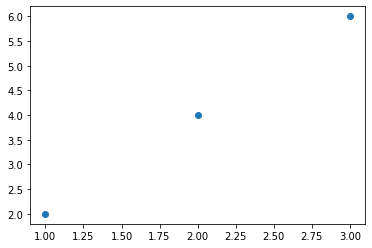

In [7]:
plt.scatter(x_data, y_data)

**Answer**: the value of $w$ is 2.0

### The model

On code un "modèle" très simple, come si c'était un réseau de neurone avec un seul poids ! 

On a ici les trois méthodes principales de tout modèle de réseu de neuronne:
 - la passe avant (*formward*) qui calcule la sortie en fonction de l'entrée
 - la fonction de coût (cost) qui mesure l'écart entre la sortie prévue (y_pred) et la sortie désirée (y).
 - le calcul du gradient du coût par rapprt au paramètre.

In [8]:
def forward(x):
    "Computes the output (forward pass)"
    return x * w

def cost(x, y):
    "Cost function"
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y):  # d_loss/d_w
    "Computes the gradient of the cost with respect to the parameter w"
    return 2 * x * (x * w - y)


### Learning the parameter

Ici on va "apprendre" le paramètre $w$ par descente du gradient (stpochastique).

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = -7.84
	gradient at (3.0,6.0) = -16.2288
After epoch: 0 w= 1.260688 loss= 7.315943039999998
	gradient at (1.0,2.0) = -1.478624
	gradient at (2.0,4.0) = -5.796206079999999
	gradient at (3.0,6.0) = -11.998146585599997
After epoch: 1 w= 1.453417766656 loss= 3.9987644858206908
	gradient at (1.0,2.0) = -1.093164466688
	gradient at (2.0,4.0) = -4.285204709416961
	gradient at (3.0,6.0) = -8.87037374849311
After epoch: 2 w= 1.5959051959019805 loss= 2.1856536232765476
	gradient at (1.0,2.0) = -0.8081896081960389
	gradient at (2.0,4.0) = -3.1681032641284723
	gradient at (3.0,6.0) = -6.557973756745939
After epoch: 3 w= 1.701247862192685 loss= 1.1946394387269013
	gradient at (1.0,2.0) = -0.59750427561463
	gradient at (2.0,4.0) = -2.3422167604093502
	gradient at (3.0,6.0) = -4.848388694047353
After epoch: 4 w= 1.7791289594933983 loss= 0.6529686924601721
	gradient at (1.0,2.0) = -0.44174208101320334
	gradient at (2.0,4

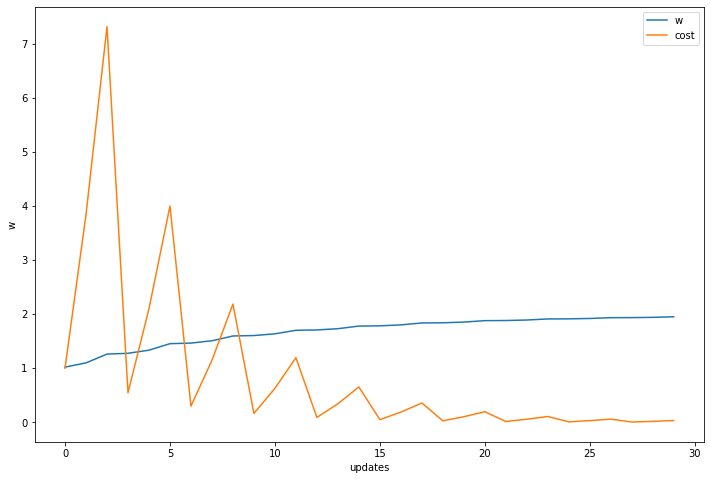

In [9]:
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 0.01
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad        
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()

## Questions

- What is the initial value of the parameter $w$ ?
→ The initial value of $w$ is $1.260688$

- What is the learning rate ?
→ The learning rate value is $0.01$

- Are you convinced that the optimal weight value is $2$ ? 
→ Yes

- How many epochs are required to get a difference $|w-2| < 0.05$ ?
→ $9$ epochs to achieve the loss value less than 0.05

- Try several learning rates (smaller or higher). What do you observe ?
→ If I increase the learning rate, the weight $w$ parameter can not convergence, both $w$ and $loss$ toward infinite. In contrast, when I decrease the learning rate, the consuming time for the weight $w$ parameter convergence after 10 epoch is not enough.

Bien expliquer ce que vous faites.

### Larger learning rate case

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = 6.399999999999999
	gradient at (3.0,6.0) = -89.27999999999999
After epoch: 0 w= 77.392 loss= 221.41439999999992
	gradient at (1.0,2.0) = 150.784
	gradient at (2.0,4.0) = -482.50880000000006
	gradient at (3.0,6.0) = 6730.997760000001
After epoch: 1 w= -5681.953664000001 loss= 1258509.190142362
	gradient at (1.0,2.0) = -11367.907328000001
	gradient at (2.0,4.0) = 36377.303449600004
	gradient at (3.0,6.0) = -507463.38312192005
After epoch: 2 w= 428526.63463628804 loss= 7153307922.48735
	gradient at (1.0,2.0) = 857049.2692725761
	gradient at (2.0,4.0) = -2742557.661672244
	gradient at (3.0,6.0) = 38258679.380327806
After epoch: 3 w= -32307327.25449904 loss= 40659070775742.23
	gradient at (1.0,2.0) = -64614658.50899808
	gradient at (2.0,4.0) = 206766907.22879386
	gradient at (3.0,6.0) = -2884398355.8416743
After epoch: 4 w= 2435714169.1551914 loss= 2.3110427431061542e+17
	gradient at (1.0,2.0) = 4871428334.31

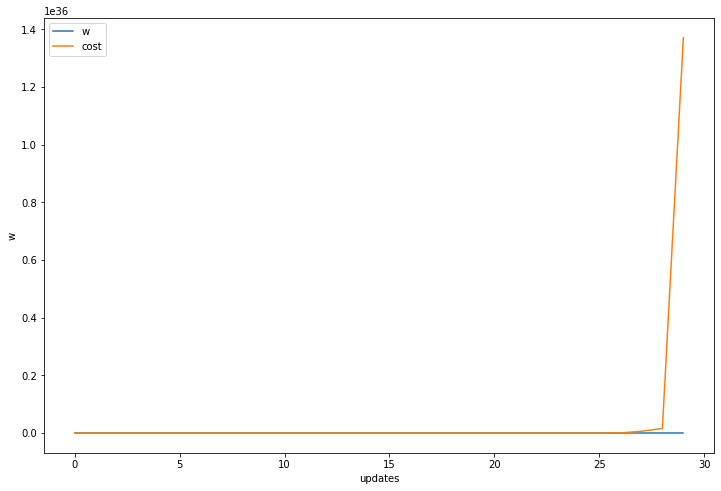

In [20]:
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 0.9
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad        
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()

### Small learning rate case

Before learning: f(4) = 4.0
	gradient at (1.0,2.0) = -2.0
	gradient at (2.0,4.0) = -7.999952
	gradient at (3.0,6.0) = -17.999460002592002
After epoch: 0 w= 1.000083998236008 loss= 8.999460010691923
	gradient at (1.0,2.0) = -1.9998320035279842
	gradient at (2.0,4.0) = -7.9992800181438515
	gradient at (3.0,6.0) = -17.997948079702685
After epoch: 1 w= 1.0001679894163122 loss= 8.9979481966576
	gradient at (1.0,2.0) = -1.9996640211673755
	gradient at (2.0,4.0) = -7.998608092732994
	gradient at (3.0,6.0) = -17.996436283812226
After epoch: 2 w= 1.0002519735415054 loss= 8.996436636592035
	gradient at (1.0,2.0) = -1.9994960529169892
	gradient at (2.0,4.0) = -7.997936223762686
	gradient at (3.0,6.0) = -17.994924614909962
After epoch: 3 w= 1.0003359506121803 loss= 8.994925330452569
	gradient at (1.0,2.0) = -1.9993280987756394
	gradient at (2.0,4.0) = -7.997264411228187
	gradient at (3.0,6.0) = -17.993413072985216
After epoch: 4 w= 1.0004199206289293 loss= 8.993414278196536
	gradient at (1.0,2.0) 

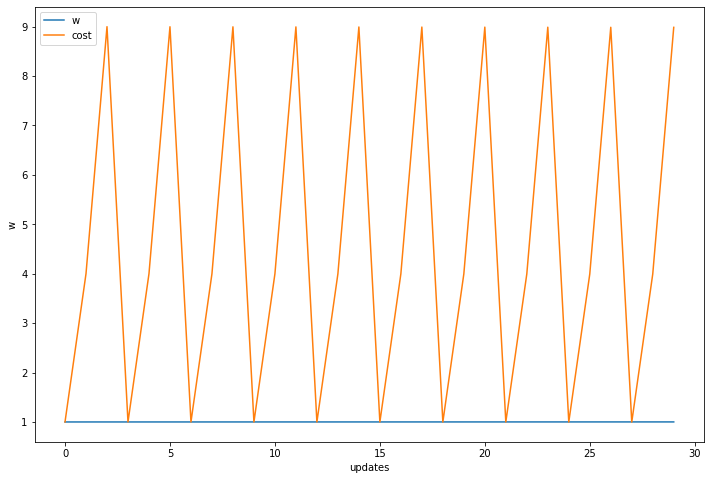

In [22]:
w = 1.0  # initial value of the parameter (chosen randomly)
num_epochs = 10
learning_rate = 3e-6
wlist = []
Llist = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        l = cost(x_val, y_val)
        grad = gradient(x_val, y_val)
        w = w - learning_rate * grad        
        print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad))
        Llist.append(l)
        wlist.append(w)
        
    print("After epoch:", epoch, "w=", w, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(wlist, label="w")
plt.plot(Llist, label="cost")
plt.xlabel("updates")
plt.ylabel("w")
plt.legend()
plt.show()